# Demo for a feature to add a time scale as an argument to the detection method

timescale 2 ->  (1.0, 4); for dt=0.10 -> (lmin=9, lmax=39)
timescale 5 ->  (2.5, 10); for dt=0.10 -> (lmin=24, lmax=99)
timescale 10 ->  (5.0, 20); for dt=0.10 -> (lmin=49, lmax=199)
timescale 20 ->  (10.0, 40); for dt=0.10 -> (lmin=99, lmax=333.3333333333333)
timescale (1, 15); for dt=0.10 -> (lmin=9, lmax=149)
timescale (10, 100); for dt=0.10 -> (lmin=99, lmax=333.3333333333333)
timescale (None, 100); for dt=0.10 -> (lmin=3, lmax=333.3333333333333)
timescale (10, None); for dt=0.10 -> (lmin=99, lmax=333)


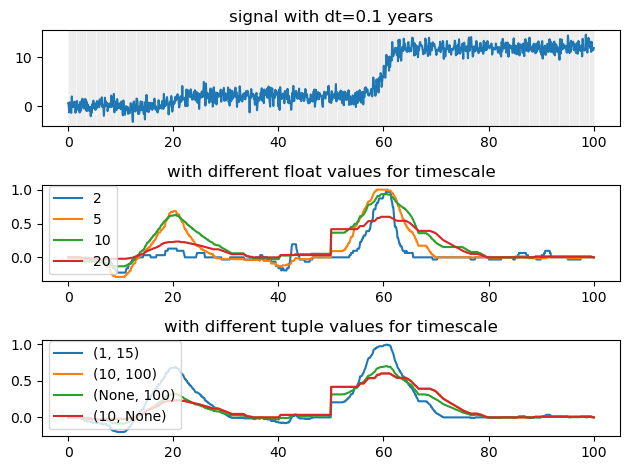

timescale 2 ->  (1.0, 4); for dt=0.50 -> (lmin=3, lmax=7)
timescale 5 ->  (2.5, 10); for dt=0.50 -> (lmin=4, lmax=19)
timescale 10 ->  (5.0, 20); for dt=0.50 -> (lmin=9, lmax=39)
timescale 20 ->  (10.0, 40); for dt=0.50 -> (lmin=19, lmax=66.66666666666667)
timescale (1, 15); for dt=0.50 -> (lmin=3, lmax=29)
timescale (10, 100); for dt=0.50 -> (lmin=19, lmax=66.66666666666667)
timescale (None, 100); for dt=0.50 -> (lmin=3, lmax=66.66666666666667)
timescale (10, None); for dt=0.50 -> (lmin=19, lmax=66)


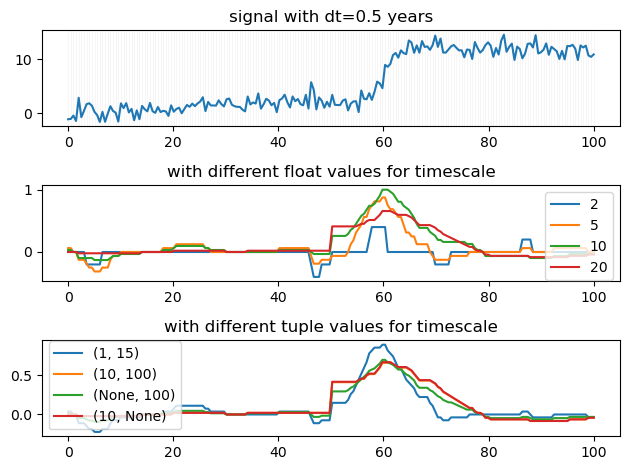

In [2]:
import toad
import numpy as np
import matplotlib.pyplot as plt


def shift(mag, t, t0):
    return mag * (1 / (1 + np.exp(-(t - t0))))


# Do the following for two different time resolutions to show that lmin, lmax
# are inferred/adapted correctly

for dt in (0.1, 0.5):
    Tmax = 100  # years
    nT = int(Tmax / dt)  # number of gridpoints in time

    # SIGNAL GENERATION =======================================================
    noise = np.random.normal(size=nT)
    time = np.linspace(0, Tmax, nT)

    signal = noise + shift(10, time, 60) + shift(2, time, 20)

    # PLOT: SIGNAL ============================================================
    fig = plt.figure()
    gs = fig.add_gridspec(ncols=1, nrows=3)
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(time, signal)
    for t in time:
        ax1.axvline(t, color="grey", alpha=0.1, lw=0.5, zorder=-1)
    ax1.set_title(f"signal with dt={dt} years")

    # PLOT: DETECTION TIME SERIES on FLOAT TIMESCALE ==========================
    ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
    for timescale in [2, 5, 10, 20]:
        detector = toad.shifts.ASDETECT.on_timescale(timescale)
        dts = detector.fit_predict(signal, time)

        ax2.plot(time, dts, label=f"{timescale}")
        ax2.set_title("with different float values for timescale")
    ax2.legend()

    # PLOT: DETECTION TIME SERIES on TUPLE TIMESCALE ==========================
    ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
    for timescale in [(1, 15), (10, 100), (None, 100), (10, None)]:
        detector = toad.shifts.ASDETECT.on_timescale(timescale)
        dts = detector.fit_predict(signal, time)

        ax3.plot(time, dts, label=f"{timescale}")
        ax3.set_title("with different tuple values for timescale")
    ax3.legend()

    plt.tight_layout()
    plt.show()